# AIVLE 1차 미니프로젝트
## 서울시 생활정보 기반 대중교통 수요 분석
### 1. 월별 버스 승하차 데이터

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')      

In [17]:
DATA_PATH = 'data/'

In [18]:
bus_station = pd.read_csv(DATA_PATH + '1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404
...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503


In [19]:
bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0, stop=2)
bus_station['자치구']

0          06
1          06
2          06
3          06
4          11
           ..
1169873    12
1169874    06
1169875    16
1169876    25
1169877    06
Name: 자치구, Length: 1169878, dtype: object

In [20]:
bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

bus_station['자치구']

0          동대문구
1          동대문구
2          동대문구
3          동대문구
4           노원구
           ... 
1169873     은평구
1169874    동대문구
1169875     강서구
1169876     강동구
1169877    동대문구
Name: 자치구, Length: 1169878, dtype: object

In [21]:
bus_station = bus_station.dropna()
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),6242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),6238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),6309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,은평구
1169874,20220430,201,201번(구리~서울역),6278,세종대왕기념관,153,43,20220503,동대문구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구


In [22]:
only_seoul = pd.read_csv(DATA_PATH + '1.1 bus_station.csv', sep=",", encoding = "UTF-8")
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)
df = pd.merge(only_seoul,bus_station,how='inner', on='버스정류장ARS번호')
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20220401,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리,4,9,20220404,종로구
1,1001,종로2가사거리,20220401,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리,5,6,20220404,종로구
2,1001,종로2가사거리,20220401,741,741번(진관차고지~헌인릉입구),종로2가사거리,206,203,20220404,종로구
3,1001,종로2가사거리,20220401,470,470번(상암차고지~안골마을),종로2가사거리,303,239,20220404,종로구
4,1001,종로2가사거리,20220402,741,741번(진관차고지~헌인릉입구),종로2가사거리,132,159,20220405,종로구
...,...,...,...,...,...,...,...,...,...,...
1060881,25990,암사삼성.현대아파트,20220426,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,89,30,20220429,강동구
1060882,25990,암사삼성.현대아파트,20220427,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,88,40,20220430,강동구
1060883,25990,암사삼성.현대아파트,20220428,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,82,33,20220501,강동구
1060884,25990,암사삼성.현대아파트,20220429,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,96,37,20220502,강동구


In [23]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [24]:
tmp = df[['노선번호', '자치구', '역명']]
tmp_nondup = tmp.drop_duplicates()
tmp = tmp_nondup.groupby(by=['노선번호', '자치구'], as_index=False)['역명'].count()
tmp.sort_values(by='노선번호', inplace=True)

In [25]:
tmp.to_csv(DATA_PATH + 'df_bus_line.csv', index=False)

In [26]:
region = ['종로구',
            '중구',
            '용산구',
            '성동구',
            '광진구',
            '동대문구',
            '중랑구',
            '성북구',
            '강북구',
            '도봉구',
            '노원구',
            '은평구',
            '서대문구',
            '마포구',
            '양천구',
            '강서구',
            '구로구',
            '금천구',
            '영등포구',
            '동작구',
            '관악구',
            '서초구',
            '강남구',
            '송파구',
            '강동구']

tmp_region = []
for i in region:
    for j in region:
        if i != j:
            tmp_ = [i, j]
            a = tmp.loc[tmp['자치구'].isin([i, j])]
            b = a.groupby(by='노선번호', as_index=False)['역명'].count()
            count = b.loc[b['역명'] == 2].shape[0]
            tmp_region.append([i, j, count])

df_region = pd.DataFrame(tmp_region, columns=['자치구1', '자치구2', '노선수'])
df_region

df_region.to_csv(DATA_PATH + 'df_bus_line.csv', index=False)

In [27]:
seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()

seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()

seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].sum()

seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)

In [28]:
a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')
seoul_bus_station

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [29]:
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

seoul_bus_station.to_csv(DATA_PATH + "df_seoul_bus_station.csv", index = False)
seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.6+ KB


In [30]:
seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [31]:
target = '자치구'
line = ['정류장수', '노선수']
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수']

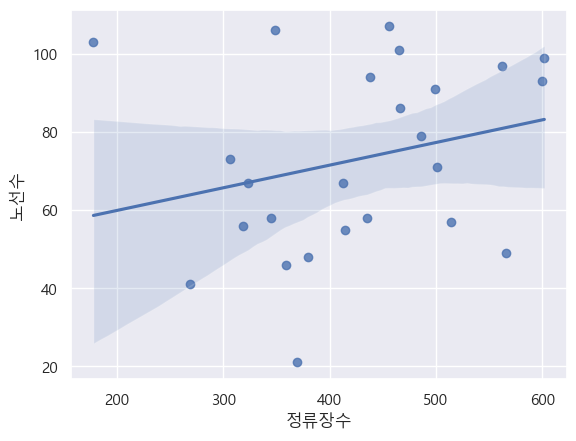

PearsonRResult(statistic=0.25879843303095595, pvalue=0.2116069696436893)


In [32]:
# 노선, 정류장 상관관계
sns.regplot(data=seoul_bus_station, x='정류장수', y='노선수')
plt.show()
result = spst.pearsonr(seoul_bus_station['정류장수'], seoul_bus_station['노선수'])
print(result)

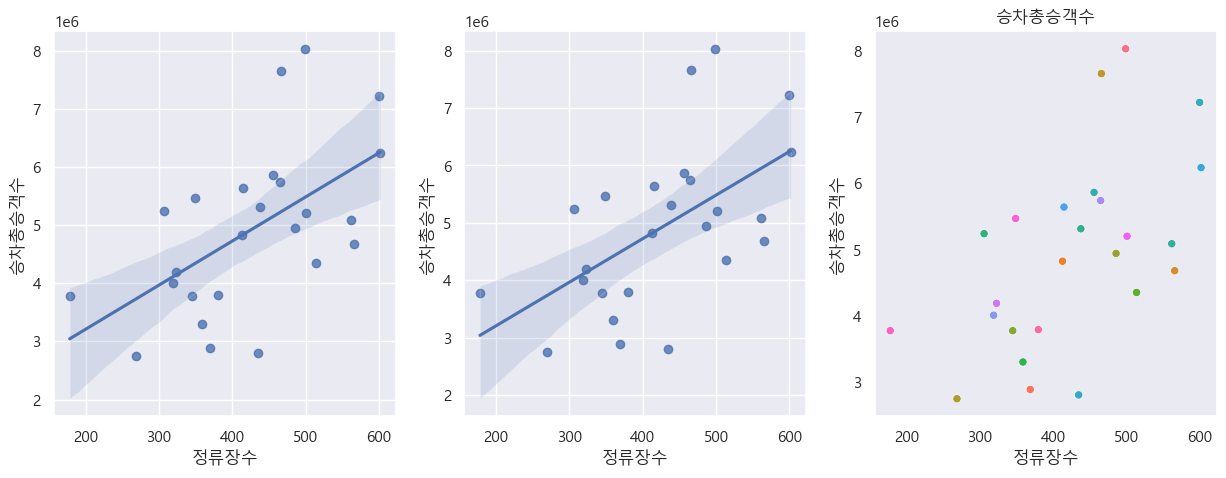

승차총승객수 : PearsonRResult(statistic=0.5666813370974586, pvalue=0.003141977397117319)


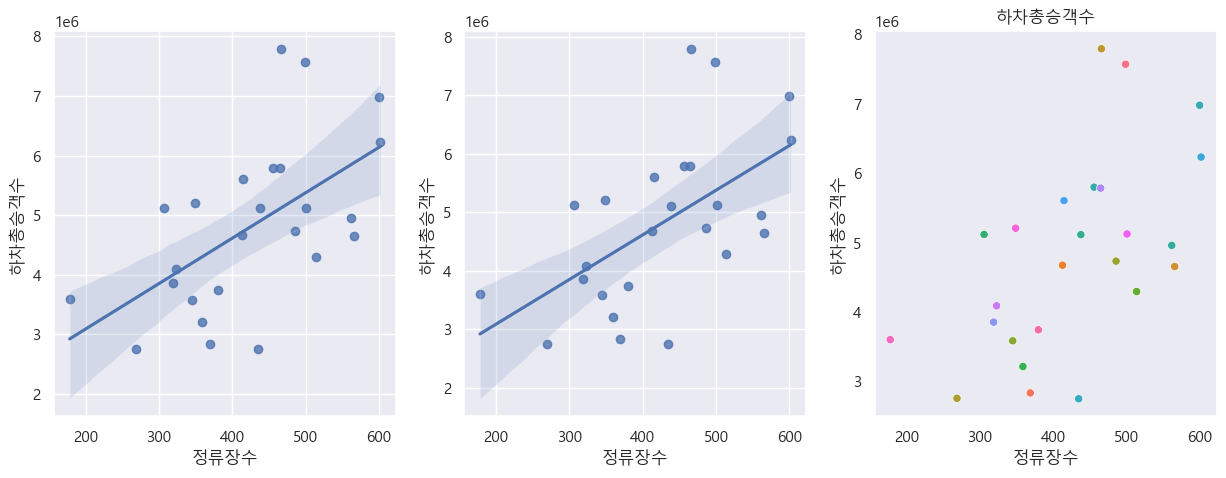

하차총승객수 : PearsonRResult(statistic=0.5784790149467576, pvalue=0.0024518332034538645)


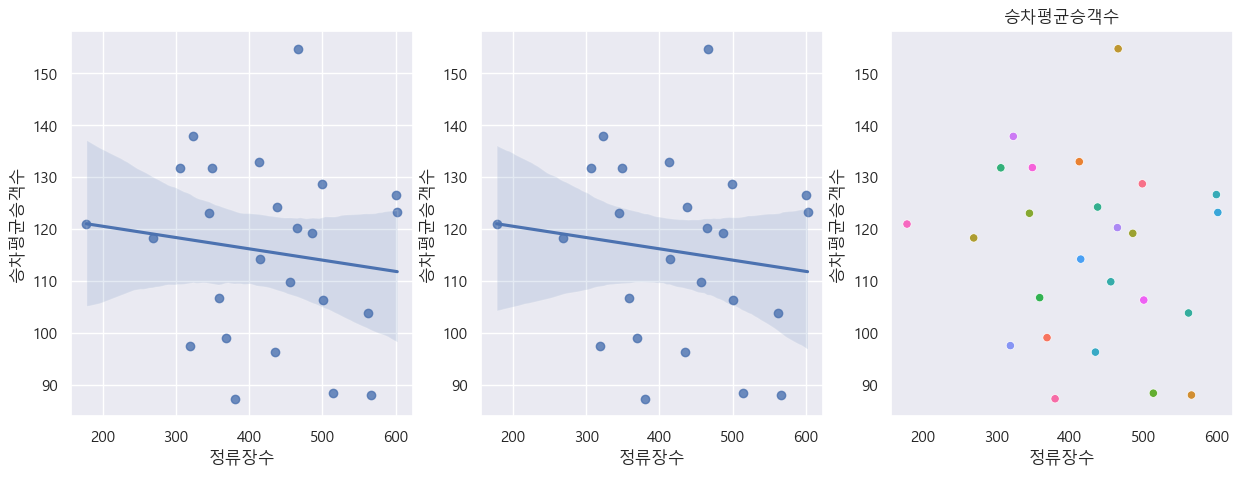

승차평균승객수 : PearsonRResult(statistic=-0.13531841122802127, pvalue=0.5189725687303919)


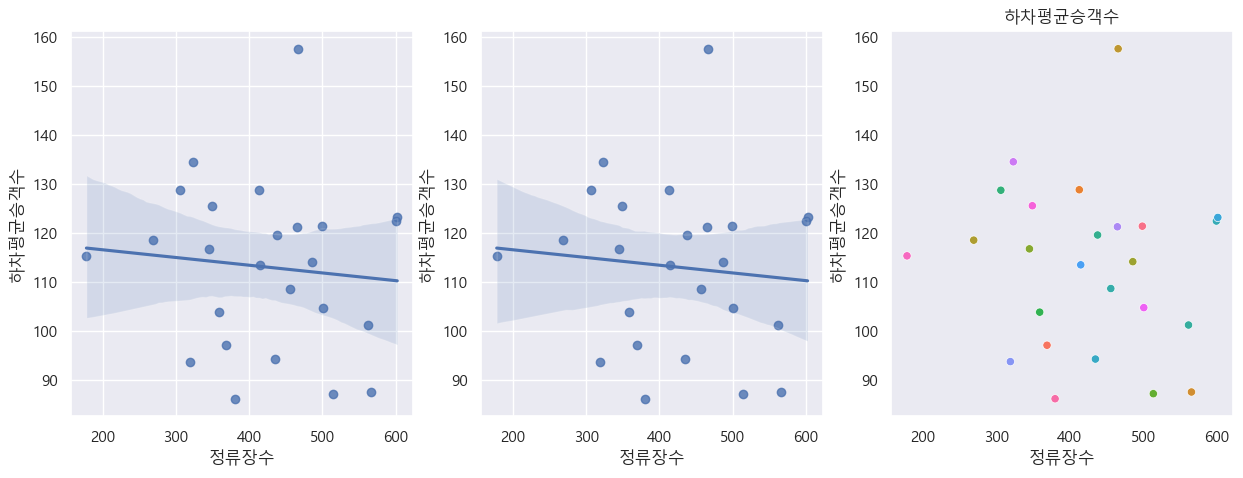

하차평균승객수 : PearsonRResult(statistic=-0.0991459213474922, pvalue=0.637273177989508)


In [33]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.regplot(data=seoul_bus_station, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=seoul_bus_station, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=seoul_bus_station, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    result = spst.pearsonr(seoul_bus_station['정류장수'], seoul_bus_station[i])
    print(f'{i} : {result}')

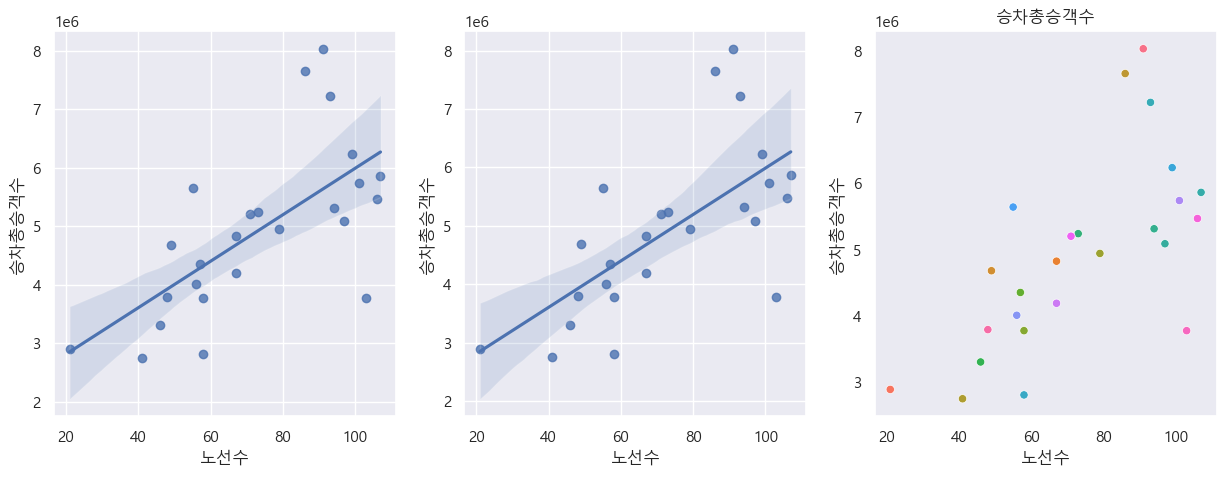

승차총승객수 : PearsonRResult(statistic=0.6654877832095705, pvalue=0.0002830862285771965)


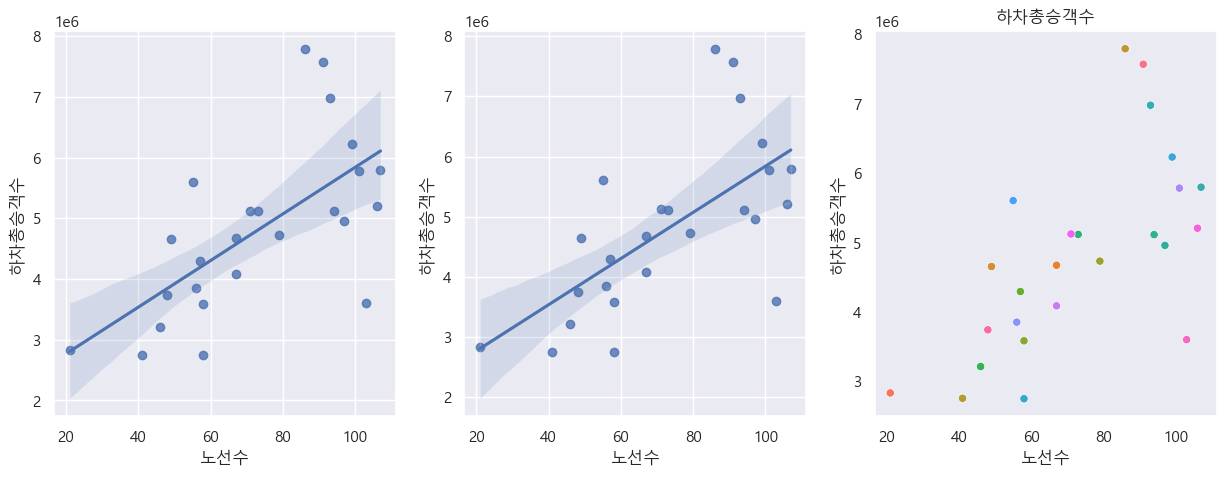

하차총승객수 : PearsonRResult(statistic=0.6526422720355217, pvalue=0.00040610118937178525)


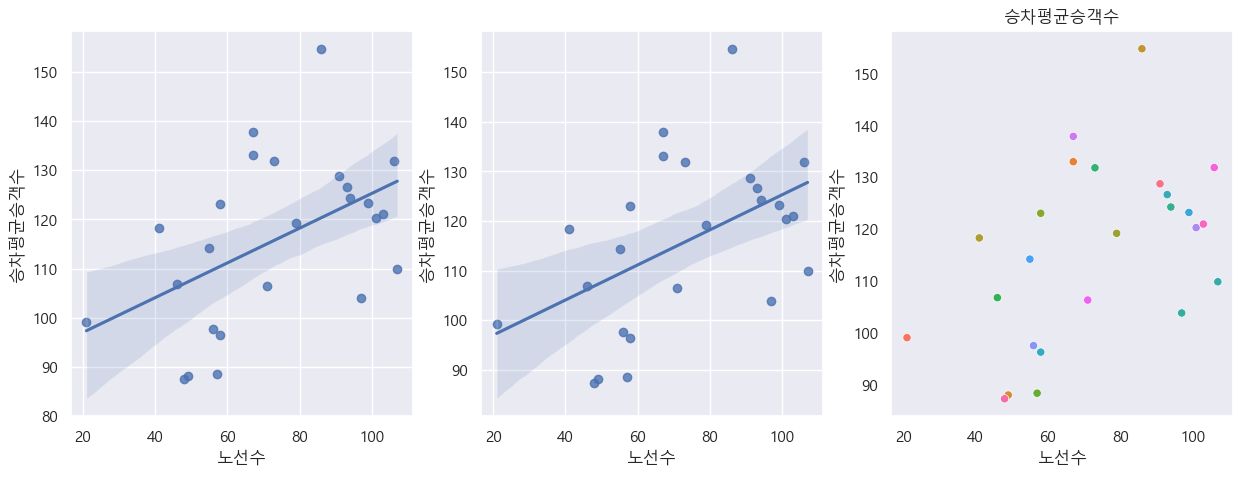

승차평균승객수 : PearsonRResult(statistic=0.49354079092741227, pvalue=0.012170019218131685)


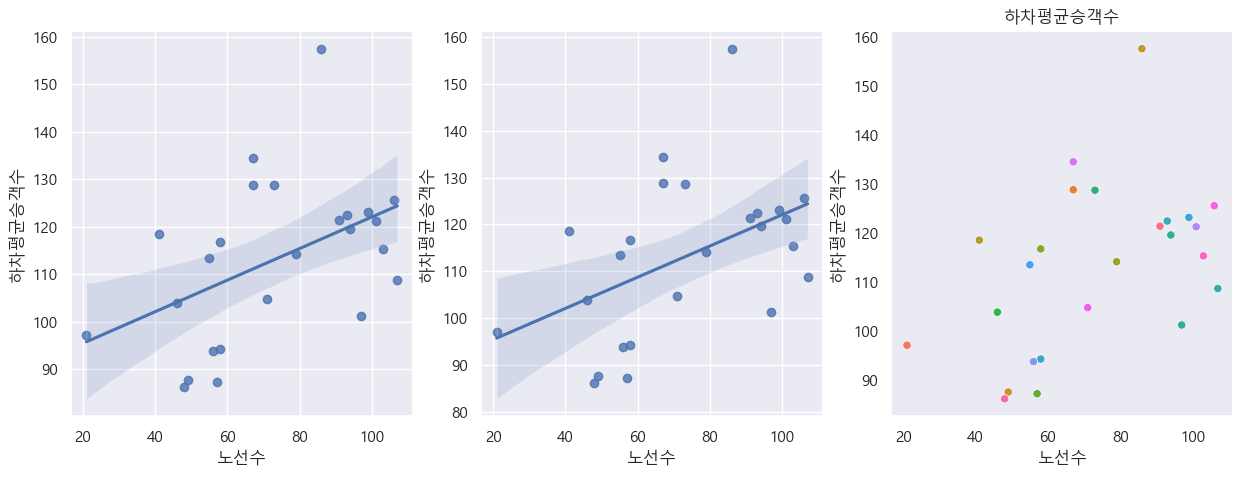

하차평균승객수 : PearsonRResult(statistic=0.4704401254149343, pvalue=0.017632441540646557)


In [34]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.regplot(data=seoul_bus_station, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=seoul_bus_station, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=seoul_bus_station, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    result = spst.pearsonr(seoul_bus_station['노선수'], seoul_bus_station[i])
    print(f'{i} : {result}')

In [35]:
seoul_bus_station['승차승객/정류장수'] = seoul_bus_station['승차총승객수'] / seoul_bus_station['정류장수']
seoul_bus_station['하차승객/정류장수'] = seoul_bus_station['하차총승객수'] / seoul_bus_station['정류장수']

seoul_bus_station['승차승객/노선수'] = seoul_bus_station['승차총승객수'] / seoul_bus_station['노선수']
seoul_bus_station['하차승객/노선수'] = seoul_bus_station['하차총승객수'] / seoul_bus_station['노선수']
seoul_bus_station['승차평균승객수/노선수'] = seoul_bus_station['승차평균승객수'] / seoul_bus_station['노선수']
seoul_bus_station['하차평균승객수/노선수'] = seoul_bus_station['하차평균승객수'] / seoul_bus_station['노선수']

seoul_bus_station[['승차승객/정류장수' , '하차승객/정류장수', '승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11922.706529,11633.129072,71363.061299,69811.839657,1.776745,1.737546
std,3377.156483,3232.972114,20555.684617,20471.192599,0.752622,0.742571
min,6453.517241,6314.340230,36666.747573,34941.087379,1.027238,1.015581
25%,9980.371053,9734.551440,56830.445545,57259.514851,1.322298,1.272036
50%,11683.246973,11311.823245,71592.357143,68770.946429,1.661679,1.625843
75%,12972.065015,12712.631579,77648.709677,75310.947368,1.985379,1.922261
max,21217.275281,20218.719101,137621.571429,134786.000000,4.721962,4.624670


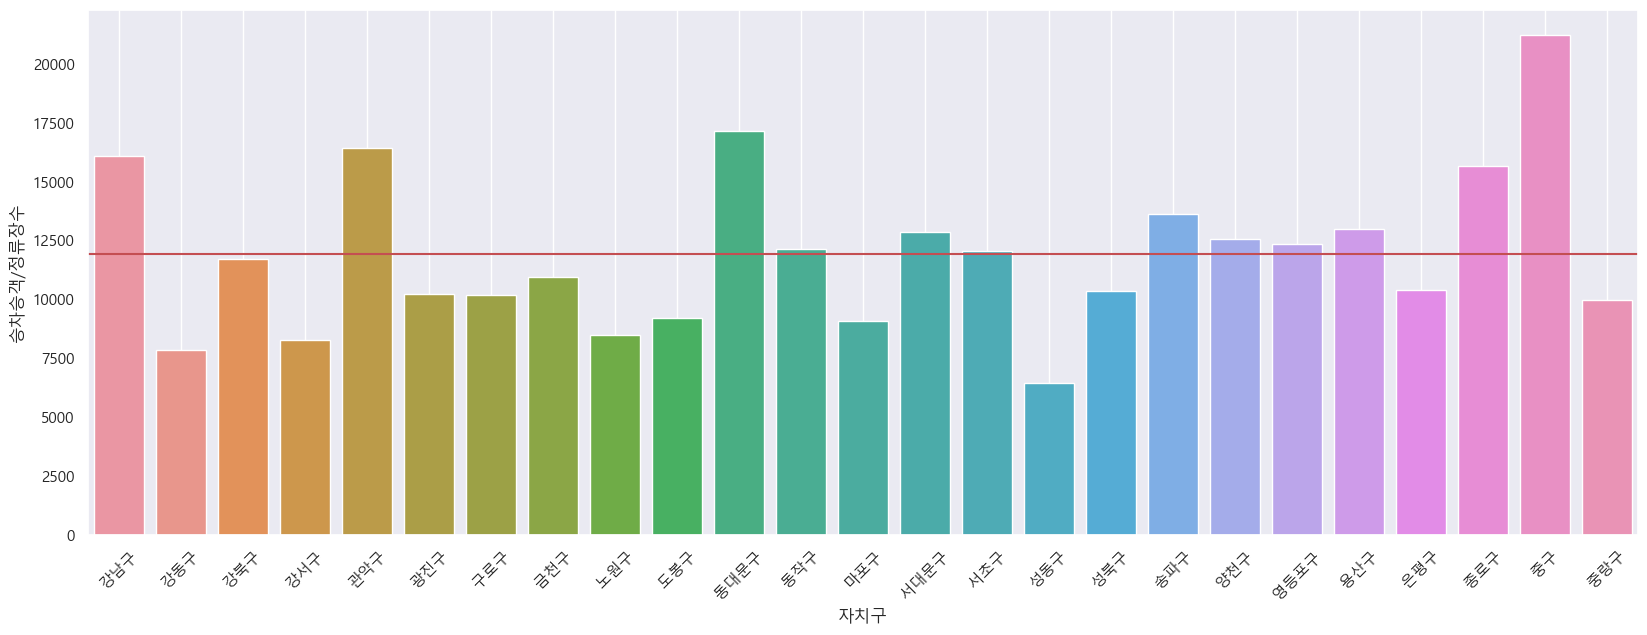

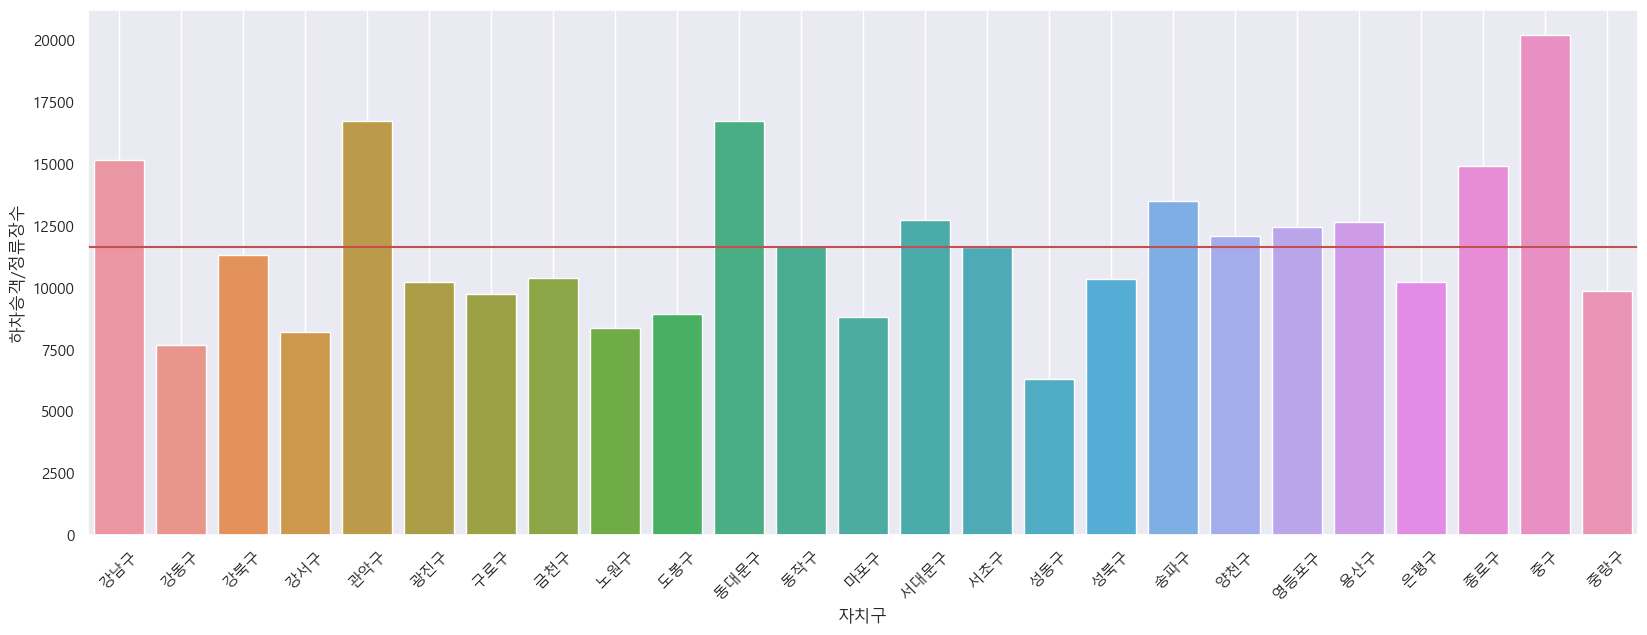

In [36]:
li = ['승차승객/정류장수' , '하차승객/정류장수']
for i in li:
    plt.figure(figsize=(20,15))
    plt.subplot(len(li),1,1)
    sns.barplot(data=seoul_bus_station, x=target, y = i)
    plt.axhline(seoul_bus_station[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [37]:
jong_bus = seoul_bus_station.loc[(seoul_bus_station['승차승객/정류장수'] > seoul_bus_station['승차승객/정류장수'].mean()) 
                                    & (seoul_bus_station['하차승객/정류장수'] > seoul_bus_station['하차승객/정류장수'].mean())
                                ]
jong_bus

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
0,강남구,499,91,8030483,7569213,128.767927,121.371512,16093.152305,15168.763527,88247.065934,83178.164835,1.415032,1.333753
4,관악구,466,86,7655819,7792476,154.753674,157.516040,16428.796137,16722.051502,89021.151163,90610.186047,1.799461,1.831582
10,동대문구,306,73,5240565,5115379,131.841430,128.692017,17126.029412,16716.924837,71788.561644,70073.684932,1.806047,1.762904
11,동작구,438,94,5314274,5112276,124.295965,119.571419,12133.045662,11671.863014,56534.829787,54385.914894,1.322298,1.272036
13,서대문구,456,107,5863499,5796960,109.914502,108.667192,12858.550439,12712.631579,54799.056075,54177.196262,1.027238,1.015581
17,송파구,415,55,5641742,5603488,114.270072,113.495260,13594.559036,13502.380723,102577.127273,101881.600000,2.077638,2.063550
18,양천구,319,56,4009172,3851173,97.627526,93.780086,12567.937304,12072.642633,71592.357143,68770.946429,1.743349,1.674644
19,영등포구,465,101,5739875,5783211,120.337855,121.246404,12343.817204,12437.012903,56830.445545,57259.514851,1.191464,1.200459
20,용산구,323,67,4189977,4086474,137.891694,134.485421,12972.065015,12651.622291,62536.970149,60992.149254,2.058085,2.007245
22,종로구,349,106,5468935,5205394,131.889620,125.534028,15670.300860,14915.169054,51593.726415,49107.490566,1.244242,1.184283


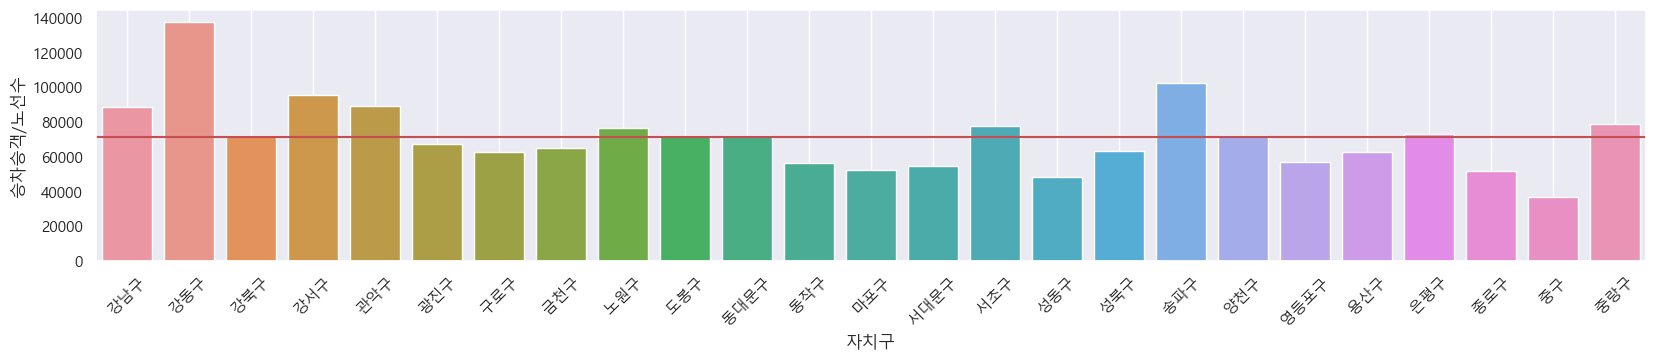

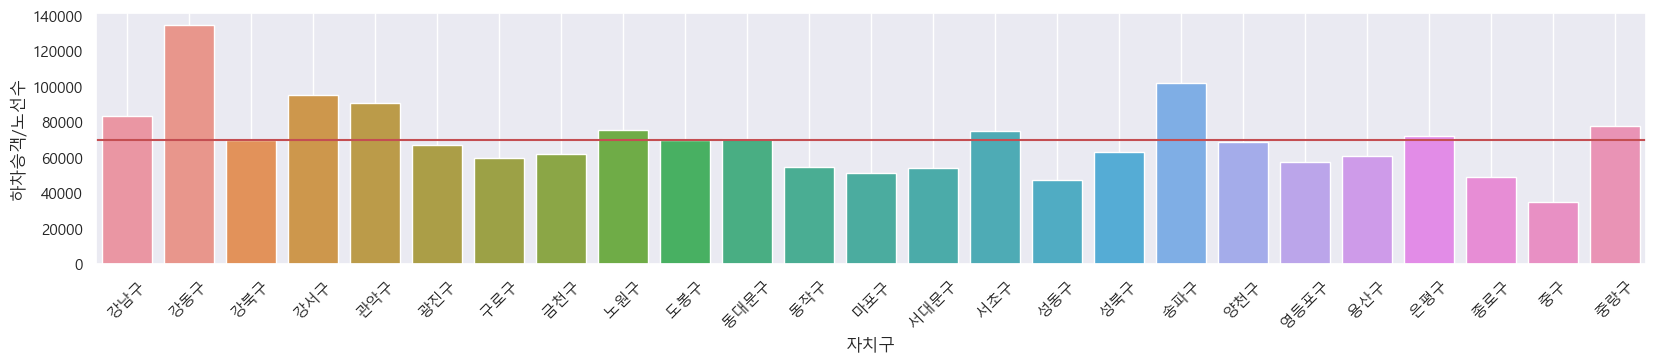

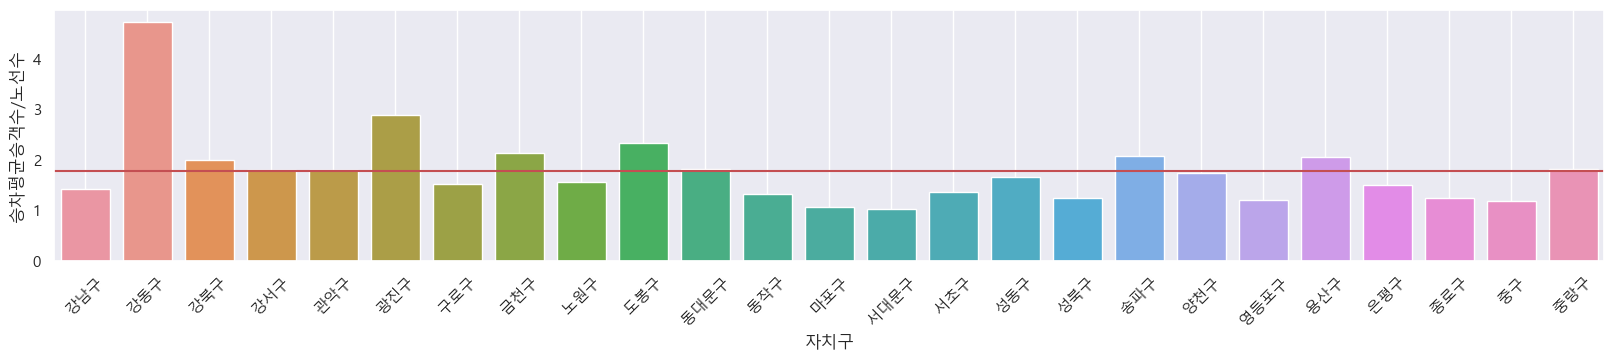

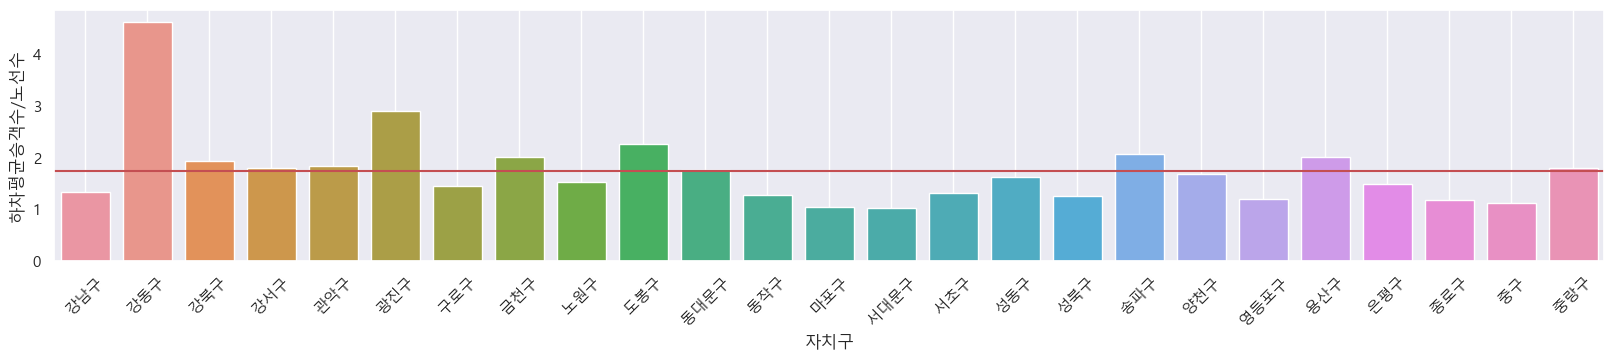

In [38]:
li = ['승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']
for i in li:
    plt.figure(figsize=(20,15))
    plt.subplot(len(li),1,1)
    sns.barplot(data=seoul_bus_station, x=target, y = i)
    plt.axhline(seoul_bus_station[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [39]:
no_bus = seoul_bus_station.loc[(seoul_bus_station['승차승객/노선수'] > seoul_bus_station['승차승객/노선수'].mean()) 
                                & (seoul_bus_station['하차승객/노선수'] > seoul_bus_station['하차승객/노선수'].mean())
                                & (seoul_bus_station['승차평균승객수/노선수'] > seoul_bus_station['승차평균승객수/노선수'].mean())
                                & (seoul_bus_station['하차평균승객수/노선수'] > seoul_bus_station['하차평균승객수/노선수'].mean())
                              ]
no_bus

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
1,강동구,369,21,2890053,2830506,99.161194,97.118065,7832.121951,7670.747967,137621.571429,134786.000000,4.721962,4.624670
3,강서구,566,49,4681083,4652828,88.119480,87.587591,8270.464664,8220.544170,95532.306122,94955.673469,1.798357,1.787502
4,관악구,466,86,7655819,7792476,154.753674,157.516040,16428.796137,16722.051502,89021.151163,90610.186047,1.799461,1.831582
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,9204.192201,8945.462396,71832.717391,69813.500000,2.323029,2.257729
10,동대문구,306,73,5240565,5115379,131.841430,128.692017,17126.029412,16716.924837,71788.561644,70073.684932,1.806047,1.762904
17,송파구,415,55,5641742,5603488,114.270072,113.495260,13594.559036,13502.380723,102577.127273,101881.600000,2.077638,2.063550
24,중랑구,380,48,3792541,3740923,87.403863,86.214261,9980.371053,9844.534211,79011.270833,77935.895833,1.820914,1.796130


In [40]:
jn_bus = seoul_bus_station.loc[(seoul_bus_station['승차승객/정류장수'] > seoul_bus_station['승차승객/정류장수'].mean()) 
                                    & (seoul_bus_station['하차승객/정류장수'] > seoul_bus_station['하차승객/정류장수'].mean())
                                    & (seoul_bus_station['승차승객/노선수'] > seoul_bus_station['승차승객/노선수'].mean()) 
                                    & (seoul_bus_station['하차승객/노선수'] > seoul_bus_station['하차승객/노선수'].mean())
                                    & (seoul_bus_station['승차평균승객수/노선수'] > seoul_bus_station['승차평균승객수/노선수'].mean())
                                    & (seoul_bus_station['하차평균승객수/노선수'] > seoul_bus_station['하차평균승객수/노선수'].mean())
                                ]
jn_bus[['자치구', '승차승객/정류장수' , '하차승객/정류장수', '승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']]

,자치구,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
4,관악구,16428.796137,16722.051502,89021.151163,90610.186047,1.799461,1.831582
10,동대문구,17126.029412,16716.924837,71788.561644,70073.684932,1.806047,1.762904
17,송파구,13594.559036,13502.380723,102577.127273,101881.600000,2.077638,2.063550
